In [1]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 

mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

# Data preparation
## Input: 
- E seed
- eta,phi,z seed
- E cluster
- delta_eta,delta_phi,

Filter only windows with the calo

In [2]:
files_ele = os.listdir("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/electrons/numpy_v5/training/")
files_gamma = os.listdir("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/gammas/numpy_v5/training/")

In [3]:
print(f"N ele files: {len(files_ele)}")
print(f"N gamma files: {len(files_gamma)}")

N ele files: 25
N gamma files: 28


In [4]:
datas_ele = []

for i in range(1, 25):
    f = f"/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/electrons/numpy_v5/training/clusters_data_{i}.pkl"
    if not os.path.exists(f):
        print("file not found: ", f)
        continue
    d = pickle.load(open(f, "rb"))
    outsc = d[(d.is_seed == False) & (d.in_scluster == False)]
    insc =  d[(d.is_seed == False) & (d.in_scluster == True)]    
    datas_ele += [insc, outsc]
    
data_ele = pd.concat(datas_ele, ignore_index=True)
data_ele["particle"] = "electron"
print("N events ele: ",len(data_ele))

datas_gamma = []
for i in range(1, 28):
    f = f"/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/gammas/numpy_v5/training/clusters_data_{i}.pkl"
    if not os.path.exists(f):
        print("file not found: ", f)
        continue
    d = pickle.load(open(f, "rb"))
    outsc = d[ (d.is_seed == False) & (d.in_scluster == False)]
    insc =  d[ (d.is_seed == False) & (d.in_scluster == True)]  
    datas_gamma += [insc, outsc]
    
data_gamma = pd.concat(datas_gamma, ignore_index=True)
data_gamma["particle"] = "gamma"
print("N events ele: ",len(data_gamma))

if data_ele.shape[0]> data_gamma.shape[0]:
    data = pd.concat([data_gamma, data_ele.iloc[0:len(data_gamma)]], ignore_index=True)
else:
    data = pd.concat([data_gamma.iloc[0:len(data_ele)], data_ele], ignore_index=True)

N events ele:  1809962
N events ele:  1855478


Balance gamma and electron

In [5]:
print("N in supercluster: ", len(data[ data.in_scluster]))
print("N out supercluster: ", len(data[data.in_scluster == False]))
w = len(data[(data.is_seed == False) & (data.in_scluster == False)]) / len(data[(data.is_seed == False) & (data.in_scluster==True)])
print(w)

N in supercluster:  742868
N out supercluster:  2877056
3.8729033960272887


In [6]:
print("caloMatch samples: ", len(data[data.is_calo_matched]))
print("Not caloMatch samples: ", len(data[data.is_calo_matched ==False]))

caloMatch samples:  1940858
Not caloMatch samples:  1679066


In [7]:
print("Sample in EB:", len(data[abs(data.seed_eta) <1.479]))
print("Sample in EE:", len(data[abs(data.seed_eta) >=1.479]))
print("Sample in EB in SC:", len(data[(abs(data.seed_eta) <1.479)&(data.in_scluster)]))
print("Sample in EE in SC:", len(data[(abs(data.seed_eta) >=1.479)&(data.in_scluster)]))


Sample in EB: 1355343
Sample in EE: 2264581
Sample in EB in SC: 496651
Sample in EE in SC: 246217


## Check plots

In [62]:
data_in = data[ (data.is_seed == False) & data.in_scluster]
data_out =  data[(data.is_seed == False) & (data.in_scluster == False)]

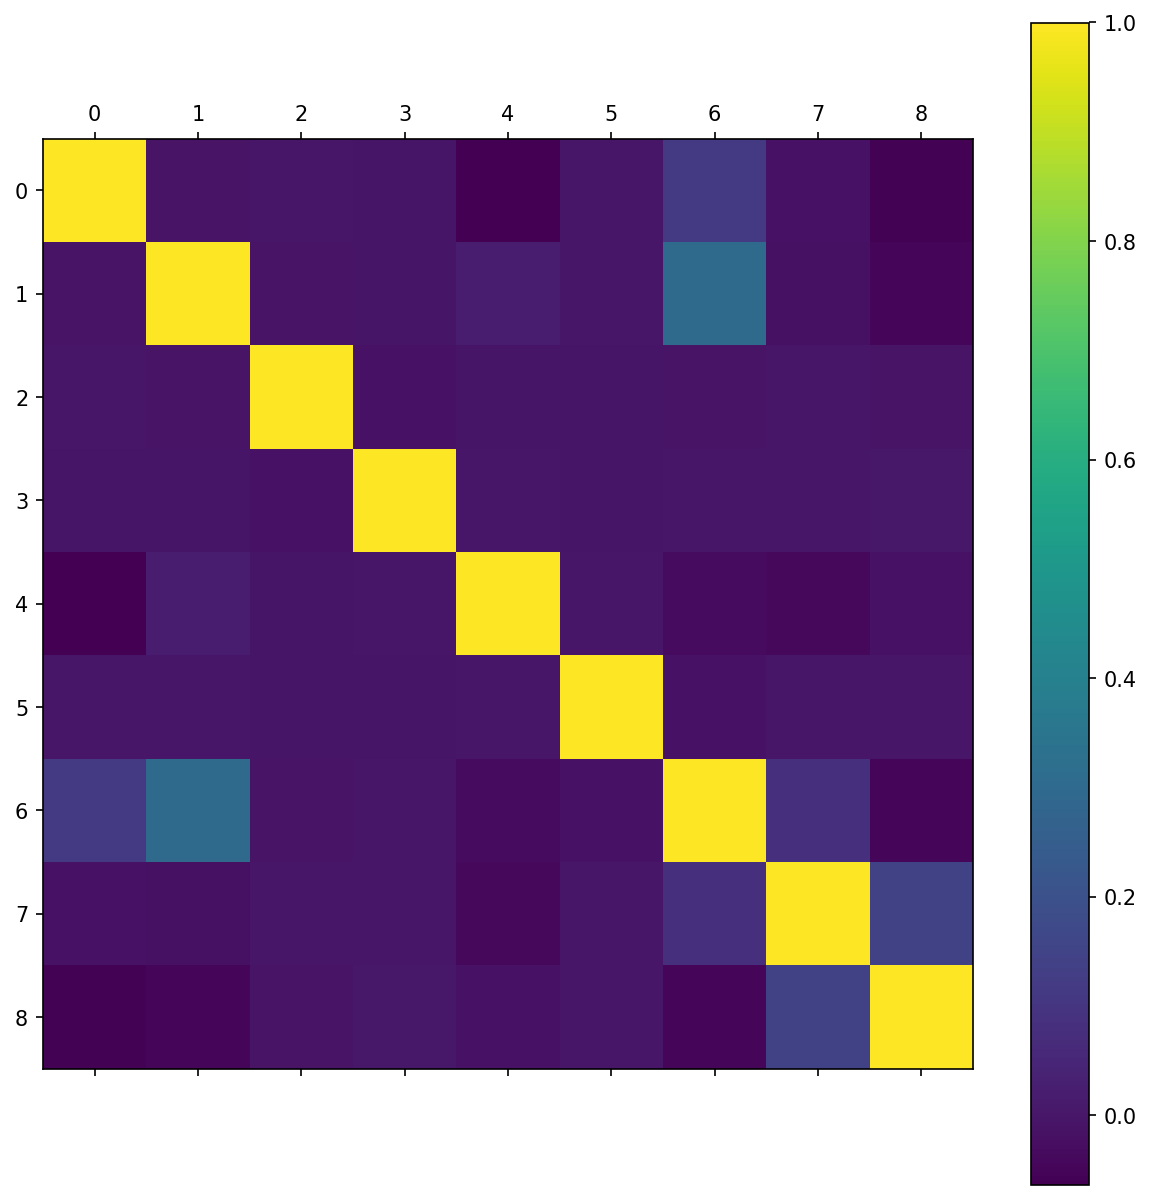

In [81]:
plt.matshow(data_in[["et_cluster", "et_seed", "seed_eta", "seed_phi", "cluster_deta", "cluster_dphi", "nxtals", "seed_swissCross", "swissCross"]].corr(), cmap="viridis")
plt.colorbar()

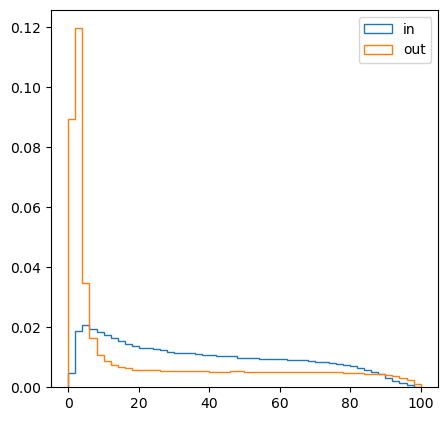

In [63]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=[0,100])
plt.hist(data_out.et_seed, histtype="step", density=True, bins=50, label="out", range=[0,100])
plt.legend()

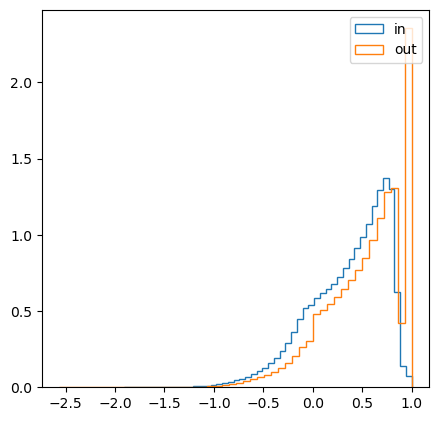

In [64]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

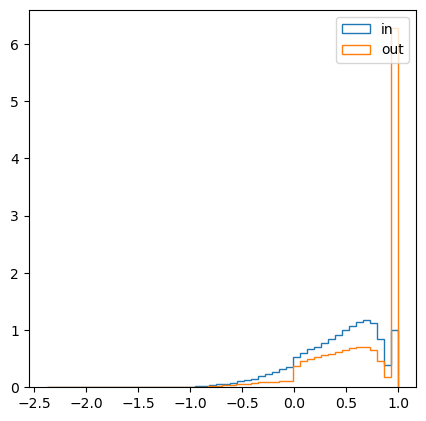

In [65]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

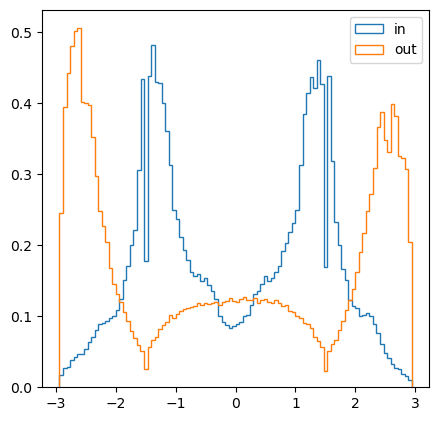

In [66]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_eta, histtype="step", density=True, bins=100, label="in")
plt.hist(data_out.seed_eta, histtype="step", density=True, bins=100, label="out")
plt.legend()

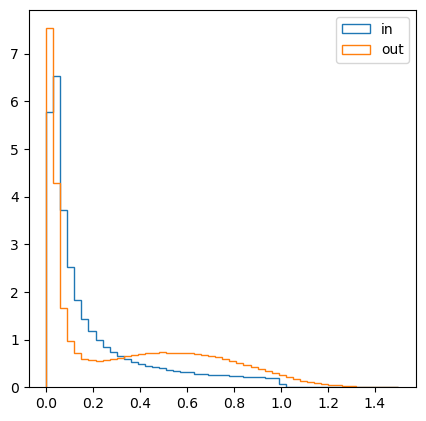

In [67]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_cluster/data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=(0,1.5))
plt.hist(data_out.et_cluster/data_out.et_seed, histtype="step", density=True, bins=50, label="out",range=(0,1.5))
plt.legend()

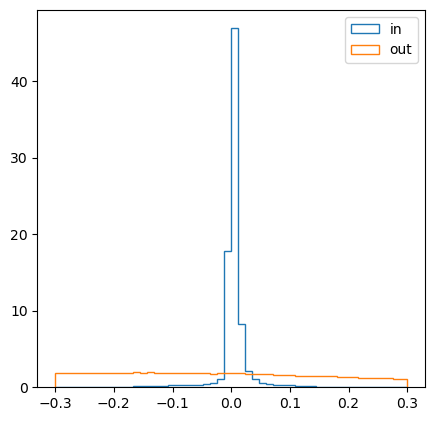

In [68]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_deta, histtype="step", density=True, bins=50, label="in", range=(-0.3,0.3))
plt.hist(data_out.cluster_deta, histtype="step", density=True, bins=50, label="out",range=(-0.3,0.3))
plt.legend()

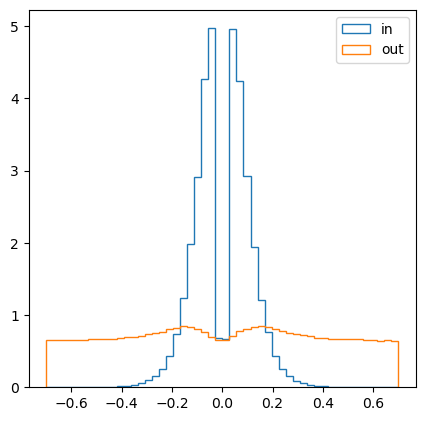

In [69]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_dphi, histtype="step", density=True, bins=50, label="in", range=(-0.7,0.7))
plt.hist(data_out.cluster_dphi, histtype="step", density=True, bins=50, label="out",range=(-0.7,0.7))
plt.legend()

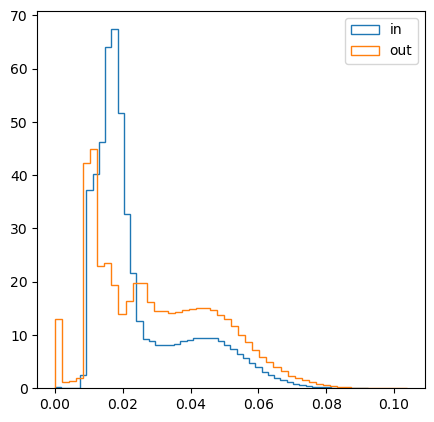

In [59]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

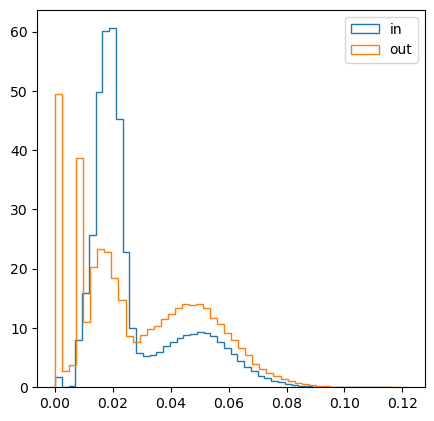

In [70]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

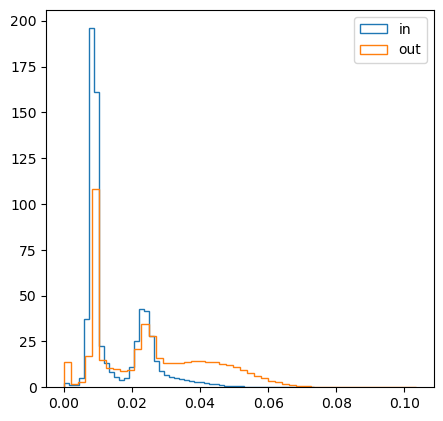

In [71]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

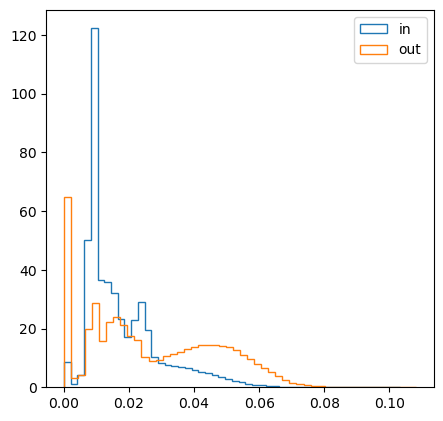

In [72]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

## Weights by DeltaPhi

In [8]:
data.columns

Index(['cl_f5_r9', 'cl_f5_sigmaIetaIeta', 'cl_f5_sigmaIetaIphi',
       'cl_f5_sigmaIphiIphi', 'cl_nxtals', 'cl_swissCross', 'cluster_deta',
       'cluster_dphi', 'cluster_iz', 'en_cluster', 'en_seed', 'en_true',
       'et_cluster', 'et_seed', 'et_true', 'in_scluster', 'index',
       'is_calo_matched', 'is_seed', 'max_dr_cluster', 'max_en_cluster',
       'nclusters', 'seed_eta', 'seed_f5_r9d', 'seed_f5_sigmaIetaIeta',
       'seed_f5_sigmaIetaIphi', 'seed_f5_sigmaIphiIphi', 'seed_iz',
       'seed_nxtals', 'seed_phi', 'seed_swissCross', 'window_index',
       'particle'],
      dtype='object')

In [11]:
cols = ["seed_eta", "seed_phi", "seed_iz","en_seed","et_seed",
        "cluster_deta", "cluster_dphi", "en_cluster", "et_cluster",
       "seed_f5_r9d", "seed_f5_sigmaIetaIeta","seed_f5_sigmaIetaIphi","seed_f5_sigmaIphiIphi","seed_swissCross","seed_nxtals",
        "cl_f5_r9", "cl_f5_sigmaIetaIeta","cl_f5_sigmaIetaIphi","cl_f5_sigmaIphiIphi","cl_swissCross", "cl_nxtals"]

In [12]:
X = data[ cols ].values
truth = data[["in_scluster"]].values
y = np.array(truth[:], dtype=int)

In [13]:
data["w"] = data.in_scluster.apply(lambda a: w if a else 1.)
weight = data.w.values

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pickle.dump(scaler, open("../models/v4_newwindow/scaler_model2.pkl", "wb"))

In [41]:
scaler.mean_

array([-7.39291934e-02, -2.82890294e-02, -2.63312158e-02,  7.28605747e+01,
        2.46173143e+01, -1.93718481e-02,  7.13126893e-05,  7.02560822e+00,
        2.08078481e+00,  1.05076307e+00,  2.40064273e-02,  2.29647514e-05,
        2.89590479e-02,  4.97279200e-01,  5.53957238e+00,  2.56913317e+00,
        2.51500571e-02,  4.24444831e-05,  2.90619658e-02,  5.98105784e-01,
        2.35013138e+00])

In [15]:
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(X_scaled, y, weight, test_size=0.25)

# Training

In [26]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import callbacks
from keras import backend as K
from keras import regularizers
from keras.callbacks import *

In [35]:
model = Sequential()
model.add(Dense(100, input_dim=X_val.shape[1], activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               2200      
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total para

In [29]:
## import and configure the plot loss callback

import dnn_plot_loss

data = {
    "X_train": X_train,
    #"X_test" : X_test, ## test != val
    "X_val" : X_val, ## test == val
    "y_train": y_train,
    #"y_test" : y_test, ## test != val
    "y_val" : y_val, ## test == val
    "W_train": w_train,
    #"W_test" : W_test, ## test != val
    "W_val": w_val, ## test == val
    "Wnn_train": w_train,

    #"W_test" : W_test, ## test != val
    "Wnn_val": w_val, ## test == val
}

plot_losses = dnn_plot_loss.PlotLosses(model, data, batch_mode=False)

In [24]:
import math
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.65
    epochs_drop = 4.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if lrate < 0.002: return 0.002
    return lrate

In [36]:
auto_save = ModelCheckpoint("../models/v4_newwindow/model3_newwindow_big.hd5", monitor='val_loss', 
                    verbose=1, save_best_only=True, save_weights_only=False, 
                    mode='auto', period=5)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, 
                            patience=15, verbose=1)


lr_scheduler = callbacks.LearningRateScheduler(step_decay, verbose=1)

history = model.fit(
            X_train, y_train,
            sample_weight = w_train,
            batch_size = 2048,
            epochs=300,
            validation_data = (X_val, y_val, w_val),
            callbacks = [early_stop, auto_save, ]#lr_scheduler
            )

Train on 2714943 samples, validate on 904981 samples
Epoch 1/300
2714943/2714943 [==============================] - 15s 5us/step - loss: 0.2231 - acc: 0.9563 - val_loss: 0.1383 - val_acc: 0.9734
Epoch 2/300
2714943/2714943 [==============================] - 13s 5us/step - loss: 0.1394 - acc: 0.9700 - val_loss: 0.1319 - val_acc: 0.9712
Epoch 3/300
2714943/2714943 [==============================] - 14s 5us/step - loss: 0.1357 - acc: 0.9710 - val_loss: 0.1293 - val_acc: 0.9727
Epoch 4/300
2714943/2714943 [==============================] - 14s 5us/step - loss: 0.1335 - acc: 0.9713 - val_loss: 0.1278 - val_acc: 0.9726
Epoch 5/300
2714943/2714943 [==============================] - 13s 5us/step - loss: 0.1326 - acc: 0.9713 - val_loss: 0.1277 - val_acc: 0.9743

Epoch 00005: val_loss improved from inf to 0.12773, saving model to ../models/v4_newwindow/model3_newwindow_big.hd5
Epoch 6/300
2714943/2714943 [==============================] - 14s 5us/step - loss: 0.1313 - acc: 0.9714 - val_loss: 0.1

>>> Computing AUC...
AUC score: 0.9966897096006696
>>> Saving ROC curve...


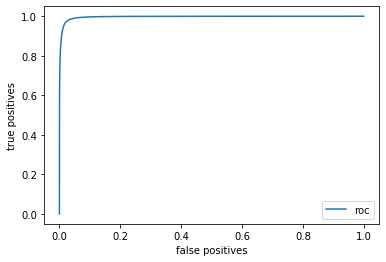

In [37]:
# Evalutation
print(">>> Computing AUC...")

from sklearn.metrics import roc_auc_score, roc_curve

pred = model.predict(X_val,batch_size=2048)
auc = roc_auc_score(y_val, pred)
print("AUC score: " + str(auc))

print(">>> Saving ROC curve...")
fp , tp, th = roc_curve(y_val, pred)
plt.plot(fp, tp, label="roc")
#plt.plot(fp, th, label="threshold")
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.ylim(-0.05,1.05)
plt.legend()

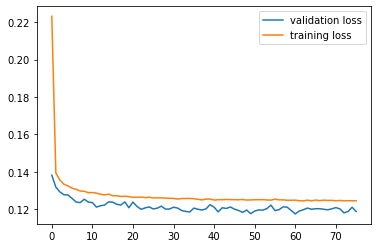

In [38]:
plt.plot(history.epoch, history.history["val_loss"], label="validation loss")
plt.plot(history.epoch, history.history["loss"], label="training loss")
plt.legend()

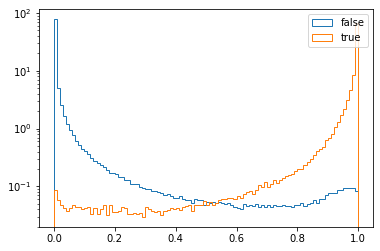

In [39]:
results = model.predict(X_val)
plt.hist(results[y_val==0], bins=100,density=True, label="false", histtype="step")
plt.hist(results[y_val==1], bins=100, density=True, label="true", histtype="step")
plt.yscale("log")
plt.legend()

# Some plots

In [1]:
from keras.models import load_model
model = load_model("models/model11_balanced_100_80_50.hd5")
scaler = pickle.load(open("models/scaler_gamma_electrons.pkl", "rb"))

Using TensorFlow backend.


OSError: Unable to open file (unable to open file: name = 'models/model11_balanced_100_80_50.hd5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [27]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()

NameError: name 'y_test' is not defined

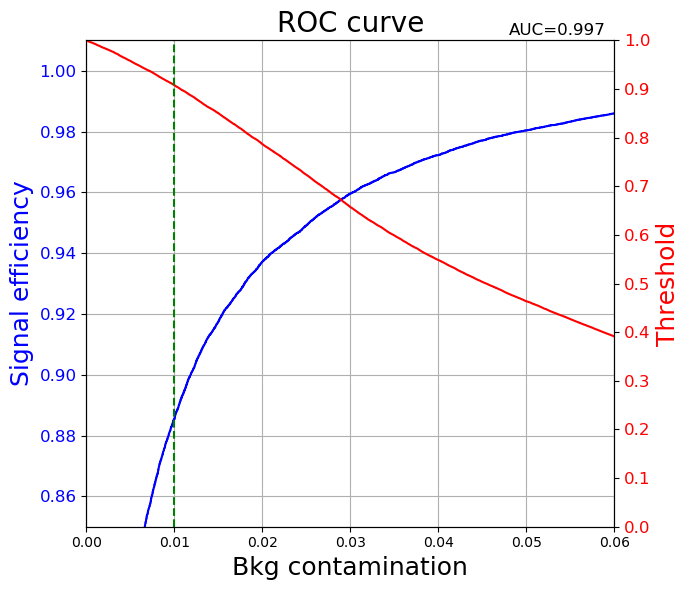

In [36]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()